# **TRABALHO FILTRO FIR E IRR: passa-baixa e passa-faixa aplicadas a sinais de áudio com ruído.**

In [ ]:
# Caso o usuário não possua as bibliotecas utilizadas na aplicação, rode esta linha
!pip3 install pandas numpy matplotlib seaborn IPython scipy librosa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import IPython.display as ipd
from scipy.io import wavfile
from scipy.signal import butter, lfilter, freqz
import librosa
import librosa.display
from librosa import load, get_samplerate
from glob import glob
from scipy import signal  
import math

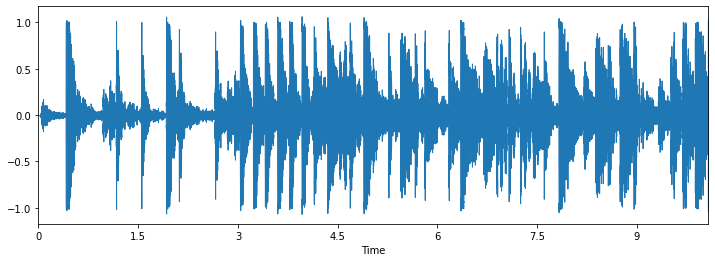

In [ ]:
# Importação do áudio que será utilizado na análise
audio, sample_rate = load('audios/audio-bateria-trabalho-de-sinais.wav')
plt.figure(figsize=(12,4))
librosa.display.waveplot(audio, sr=sample_rate)
plt.show()

In [ ]:
# Player para ouvir o áudio original
ipd.Audio(data=audio, rate=sample_rate)

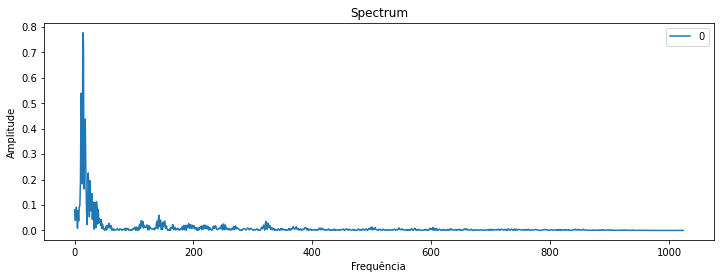

In [ ]:
# Demonstração em Espectrograma
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(audio[:n_fft], hop_length = n_fft+1))
# plt.plot(ft);
sns.lineplot(data=ft, linewidth=1.5)
plt.title('Spectrum')
plt.xlabel('Frequência')
plt.ylabel('Amplitude')
plt.show()

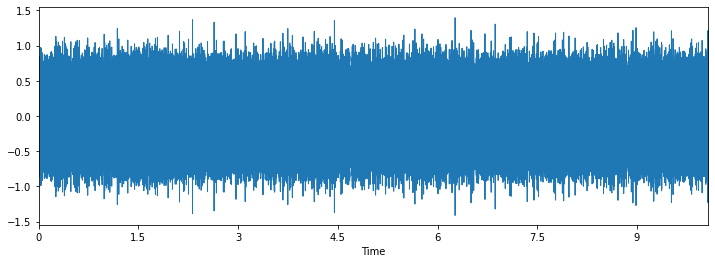

In [ ]:
# Criando um ruído
noise = np.random.normal(0, .3, audio.shape)

plt.figure(figsize=(12,4))
librosa.display.waveplot(noise, sr=sample_rate)
plt.show()

In [ ]:
# Player para ouvir o ruído criado
ipd.Audio(data=noise, rate=sample_rate)

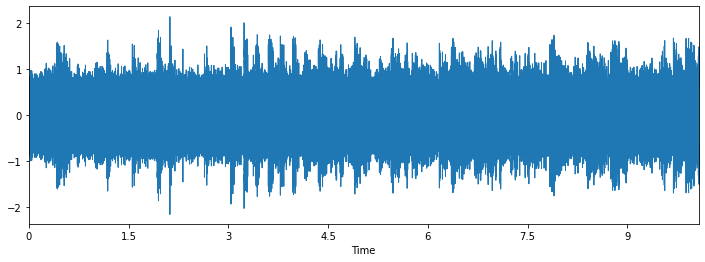

In [ ]:
# Adicionando o ruído ao áudio original
new_signal = audio + noise

plt.figure(figsize=(12,4))
librosa.display.waveplot(new_signal, sr=sample_rate)
plt.show()

In [ ]:
# Player para ouvir o áudio com o ruído
ipd.Audio(data=new_signal, rate=sample_rate)

# **Filtro de passa-baixa:**

/usr/local/lib/python3.7/dist-packages/librosa/util/utils.py:200: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  "on a non-contiguous input. This will result in a copy.".format(axis)


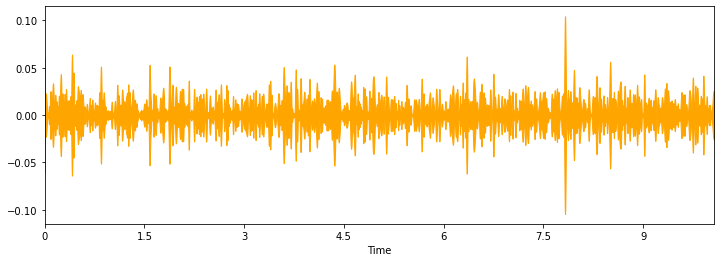

In [ ]:
from scipy.signal.signaltools import filtfilt

cutoff = 30
nyq = 0.5 * sample_rate
order = 5

def filter_lowpass(data, cutoff, fs, order):
  normal_cutoff = cutoff/nyq
  b, a = butter(order, normal_cutoff, btype='low')
  y = filtfilt(b, a, data)

  return y

lowpass_audio_filtered = filter_lowpass(new_signal, cutoff, sample_rate, order)

plt.figure(figsize=(12,4))
librosa.display.waveplot(lowpass_audio_filtered, sr=sample_rate, color="orange")
plt.show()

In [ ]:
ipd.Audio(data=lowpass_audio_filtered, rate=sample_rate)

# **Filtro de passa-faixa:**

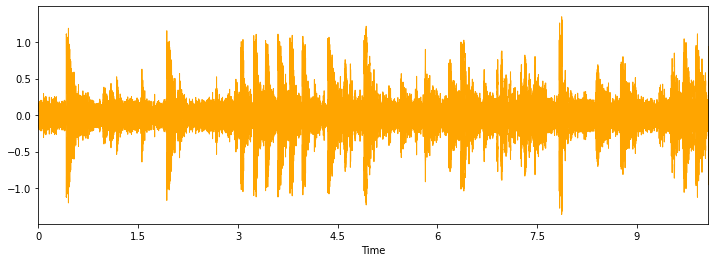

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


lowcut = 100.0
highcut = 800.0

bandpass_filtered_audio = butter_bandpass_filter(new_signal, lowcut, highcut, sample_rate, order)

plt.figure(figsize=(12,4))
librosa.display.waveplot(bandpass_filtered_audio, sr=sample_rate, color="orange")
plt.show()

In [ ]:
ipd.Audio(data=bandpass_filtered_audio, rate=sample_rate)